In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
def bigger_fonts(ax):
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(20)

In [3]:
def rand_cmap(nlabels, type='bright', first_color_black=True, last_color_black=False, verbose=True):
    """
    Creates a random colormap to be used together with matplotlib. Useful for segmentation tasks
    :param nlabels: Number of labels (size of colormap)
    :param type: 'bright' for strong colors, 'soft' for pastel colors
    :param first_color_black: Option to use first color as black, True or False
    :param last_color_black: Option to use last color as black, True or False
    :param verbose: Prints the number of labels and shows the colormap. True or False
    :return: colormap for matplotlib
    """
    from matplotlib.colors import LinearSegmentedColormap
    import colorsys
    import numpy as np
    if type not in ('bright', 'soft'):
        print ('Please choose "bright" or "soft" for type')
        return

    if verbose:
        print('Number of labels: ' + str(nlabels))

    # Generate color map for bright colors, based on hsv
    if type == 'bright':
        randHSVcolors = [(np.random.uniform(low=0.0, high=1),
                          np.random.uniform(low=0.2, high=1),
                          np.random.uniform(low=0.9, high=1)) for i in range(nlabels)]

        # Convert HSV list to RGB
        randRGBcolors = []
        for HSVcolor in randHSVcolors:
            randRGBcolors.append(colorsys.hsv_to_rgb(HSVcolor[0], HSVcolor[1], HSVcolor[2]))

        if first_color_black:
            randRGBcolors[0] = [0, 0, 0]

        if last_color_black:
            randRGBcolors[-1] = [0, 0, 0]

        random_colormap = LinearSegmentedColormap.from_list('new_map', randRGBcolors, N=nlabels)

    # Generate soft pastel colors, by limiting the RGB spectrum
    if type == 'soft':
        low = 0.6
        high = 0.95
        randRGBcolors = [(np.random.uniform(low=low, high=high),
                          np.random.uniform(low=low, high=high),
                          np.random.uniform(low=low, high=high)) for i in range(nlabels)]

        if first_color_black:
            randRGBcolors[0] = [0, 0, 0]

        if last_color_black:
            randRGBcolors[-1] = [0, 0, 0]
        random_colormap = LinearSegmentedColormap.from_list('new_map', randRGBcolors, N=nlabels)

    # Display colorbar
    if verbose:
        from matplotlib import colors, colorbar
        from matplotlib import pyplot as plt
        fig, ax = plt.subplots(1, 1, figsize=(15, 0.5))

        bounds = np.linspace(0, nlabels, nlabels + 1)
        norm = colors.BoundaryNorm(bounds, nlabels)

        cb = colorbar.ColorbarBase(ax, cmap=random_colormap, norm=norm, spacing='proportional', ticks=None,
                                   boundaries=bounds, format='%1i', orientation=u'horizontal')

    return random_colormap

In [4]:
spotify_df = pd.read_csv('../data/data.csv', infer_datetime_format=True, parse_dates=['Date'])

In [5]:
spotify_df['day_of_week'] = spotify_df['Date'].dt.dayofweek
spotify_df['day'] = spotify_df['day_of_week'].map({0:'Monday',1:'Tuesday',\
                                                     2:'Wednesday',3:'Thursday',\
                                                     4:'Friday',5:'Saturday',6:'Sunday'})
spotify_df.head()

,Position,Track Name,Artist,Streams,URL,Date,Region,day_of_week,day
0,1,Chantaje,Shakira,253019,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ar,6,Sunday
1,2,Vente Pa' Ca,Ricky Martin,223988,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ar,6,Sunday
2,3,Reggaetón Lento (Bailemos),CNCO,210943,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ar,6,Sunday
3,4,Safari,J Balvin,173865,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ar,6,Sunday
4,5,Shaky Shaky,Daddy Yankee,153956,https://open.spotify.com/track/58IL315gMSTD37D...,2017-01-01,ar,6,Sunday


In [6]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017625 entries, 0 to 2017624
Data columns (total 9 columns):
Position       int64
Track Name     object
Artist         object
Streams        int64
URL            object
Date           datetime64[ns]
Region         object
day_of_week    int64
day            object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 138.5+ MB


In [7]:
spotify_df.describe()

,Position,Streams,day_of_week
count,2.017625e+06,2.017625e+06,2.017625e+06
mean,9.394797e+01,5.208577e+04,2.993814e+00
std,5.735935e+01,2.095484e+05,2.002716e+00
min,1.000000e+00,1.001000e+03,0.000000e+00
25%,4.400000e+01,3.189000e+03,1.000000e+00
50%,9.100000e+01,8.674000e+03,3.000000e+00
75%,1.420000e+02,2.814300e+04,5.000000e+00
max,2.000000e+02,1.138152e+07,6.000000e+00


In [8]:
top_o_charts = spotify_df[spotify_df['Position'] == 1]
songs_that_topped = set((top_o_charts['Track Name'].tolist()))
print(songs_that_topped)
print(len(songs_that_topped))
region_charts = top_o_charts[['Date','Region','Streams','Artist','Track Name', 'day_of_week','day']].reset_index()
print(len(region_charts))
region_charts.head()

{nan, 'Here With You', 'City Lights', 'There for You', 'Thunder', 'Rockabye (feat. Sean Paul & Anne-Marie)', '24K Magic', 'Closer', 'Robarte un Beso', 'All I Need', 'Nougat', 'Yolla', 'Hula Hula', 'Lapioin', 'Come Again', 'Chantaje', 'Hukutaan', 'Shape of You', 'Fetish (feat. Gucci Mane)', 'Fy faen', 'EYO (feat. Nelli Matula)', 'Felices los 4', 'Fazer Falta', 'In The End', 'Akad', 'One Dance', 'Sua Cara (feat. Anitta & Pabllo Vittar)', 'Mi Gente', 'Alleen', 'Mauvaise graine', 'Loterij', 'Habiba', 'Rahan takii', 'Bimbi', 'Ahora Dice', 'Pizza Kebab', 'Paris', 'XO TOUR Llif3', 'I Can´t Go On', 'Helwa', 'Você Partiu Meu Coração', 'Cuando Se Pone a Bailar', 'Me Rehúso', 'Millionär', 'Despacito - Remix', 'Nostalgia', 'Eikö Sua Hävetä', 'Reggaetón Lento (Bailemos)', 'Dexter', 'De Snakker', 'Happy Days', 'Something Just Like This', 'Vai Embrazando', 'Starboy', 'Ég Vil Það', 'Yhtäccii', "It Ain't Me (with Selena Gomez)", 'Kylmii Väreitä', 'Traîtres', 'Waiting For', 'I Don’t Wanna Live Forever (

,index,Date,Region,Streams,Artist,Track Name,day_of_week,day
0,0,2017-01-01,ar,253019,Shakira,Chantaje,6,Sunday
1,200,2017-01-02,ar,185399,Shakira,Chantaje,0,Monday
2,400,2017-01-03,ar,183132,Shakira,Chantaje,1,Tuesday
3,600,2017-01-04,ar,186926,Shakira,Chantaje,2,Wednesday
4,800,2017-01-05,ar,191288,Shakira,Chantaje,3,Thursday


In [9]:
avg_streams = spotify_df.groupby(['Region','Date'])['Region','Streams'].mean().reset_index()
avg_streams.rename(columns={'Streams':'avg_streams'}, inplace=True)
print(len(avg_streams))
avg_streams.head()

11854


,Region,Date,avg_streams
0,ar,2017-01-01,39444.360
1,ar,2017-01-02,30050.205
2,ar,2017-01-03,29609.535
3,ar,2017-01-04,30097.865
4,ar,2017-01-05,31118.230


In [10]:
streaming_data = region_charts.merge(avg_streams, on=('Date', 'Region'), how='left')
streaming_data.rename(columns={'Streams':'Streams_#1_song'}, inplace=True)
streaming_data.head()

,index,Date,Region,Streams_#1_song,Artist,Track Name,day_of_week,day,avg_streams
0,0,2017-01-01,ar,253019,Shakira,Chantaje,6,Sunday,39444.360
1,200,2017-01-02,ar,185399,Shakira,Chantaje,0,Monday,30050.205
2,400,2017-01-03,ar,183132,Shakira,Chantaje,1,Tuesday,29609.535
3,600,2017-01-04,ar,186926,Shakira,Chantaje,2,Wednesday,30097.865
4,800,2017-01-05,ar,191288,Shakira,Chantaje,3,Thursday,31118.230


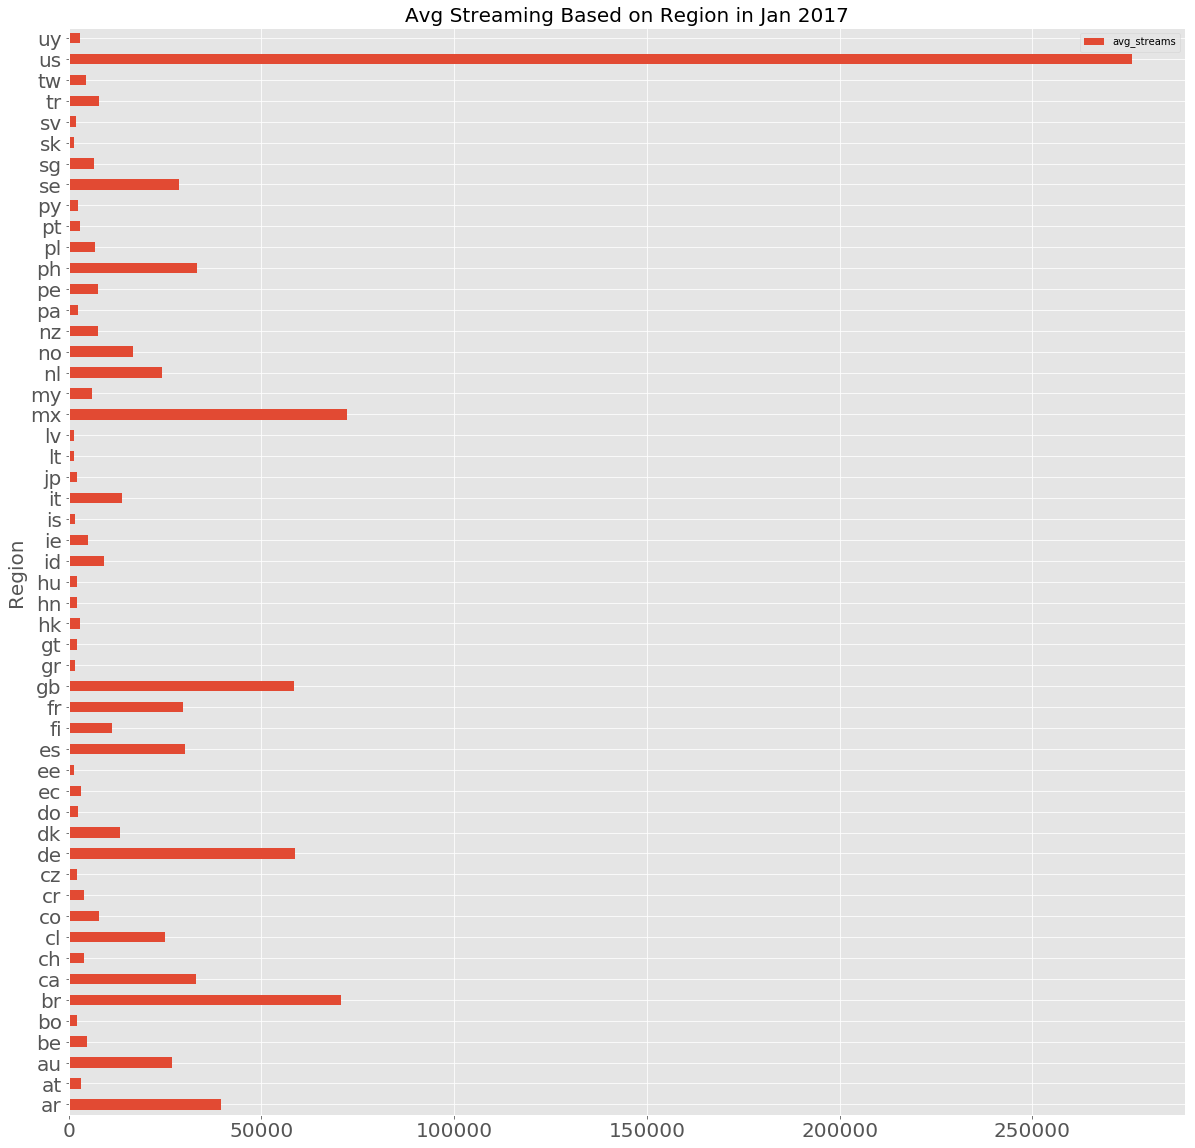

In [11]:
streaming_data_no_global = streaming_data[streaming_data['Region'] != 'global']
ax = streaming_data_no_global[streaming_data_no_global['Date'] == '2017-01-01'].plot.barh(x='Region', \
                                                                                          y=['avg_streams'],\
                                                                                        figsize=(20,20),\
                                                                                         title = 'Avg Streaming Based on Region in Jan 2017')
bigger_fonts(ax)

In [12]:
global_streaming_data = streaming_data[streaming_data['Region'] == 'global']
global_streaming_data.head()

,index,Date,Region,Streams_#1_song,Artist,Track Name,day_of_week,day,avg_streams
4629,822764,2017-01-01,global,3135625,The Weeknd,Starboy,6,Sunday,743065.835
4630,822964,2017-01-02,global,3342769,The Weeknd,Starboy,0,Monday,774054.180
4631,823164,2017-01-03,global,3563076,The Weeknd,Starboy,1,Tuesday,831199.650
4632,823364,2017-01-04,global,3619247,The Weeknd,Starboy,2,Wednesday,846262.535
4633,823564,2017-01-05,global,3579206,The Weeknd,Starboy,3,Thursday,849595.470


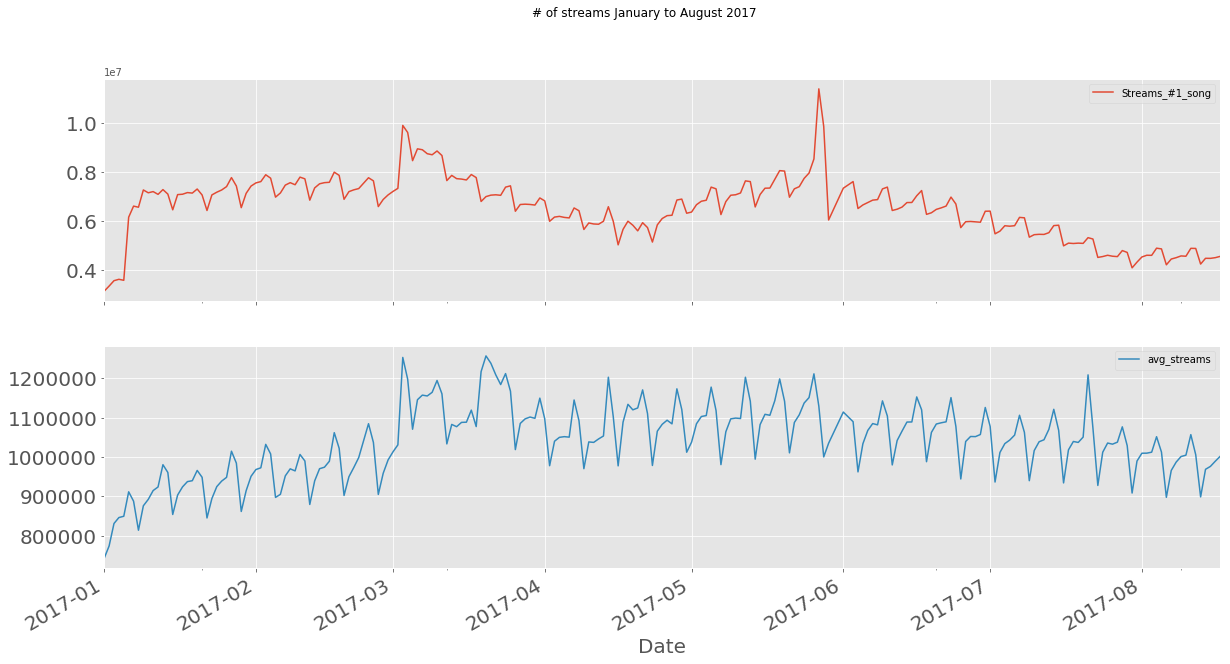

In [13]:
#Plotting streaming data
ax1, ax2 = global_streaming_data.plot(kind='line',x='Date', \
                                y=['Streams_#1_song', 'avg_streams'], figsize=(20,10),\
                                title='# of streams January to August 2017', subplots=True)
bigger_fonts(ax1)
bigger_fonts(ax2)

In [14]:
#getting streaming data for Januray
jan_data = global_streaming_data[global_streaming_data['Date'] <= '2017-02-01']
jan_data.head(10)

,index,Date,Region,Streams_#1_song,Artist,Track Name,day_of_week,day,avg_streams
4629,822764,2017-01-01,global,3135625,The Weeknd,Starboy,6,Sunday,743065.835
4630,822964,2017-01-02,global,3342769,The Weeknd,Starboy,0,Monday,774054.180
4631,823164,2017-01-03,global,3563076,The Weeknd,Starboy,1,Tuesday,831199.650
4632,823364,2017-01-04,global,3619247,The Weeknd,Starboy,2,Wednesday,846262.535
4633,823564,2017-01-05,global,3579206,The Weeknd,Starboy,3,Thursday,849595.470
4634,823764,2017-01-06,global,6151345,Ed Sheeran,Shape of You,4,Friday,911607.935
4635,823964,2017-01-07,global,6602494,Ed Sheeran,Shape of You,5,Saturday,887835.120
4636,824164,2017-01-08,global,6557531,Ed Sheeran,Shape of You,6,Sunday,814157.455
4637,824364,2017-01-09,global,7261007,Ed Sheeran,Shape of You,0,Monday,876179.295
4638,824564,2017-01-10,global,7145757,Ed Sheeran,Shape of You,1,Tuesday,892404.280


## Looks like # of Streams is cyclical based on Day of Week

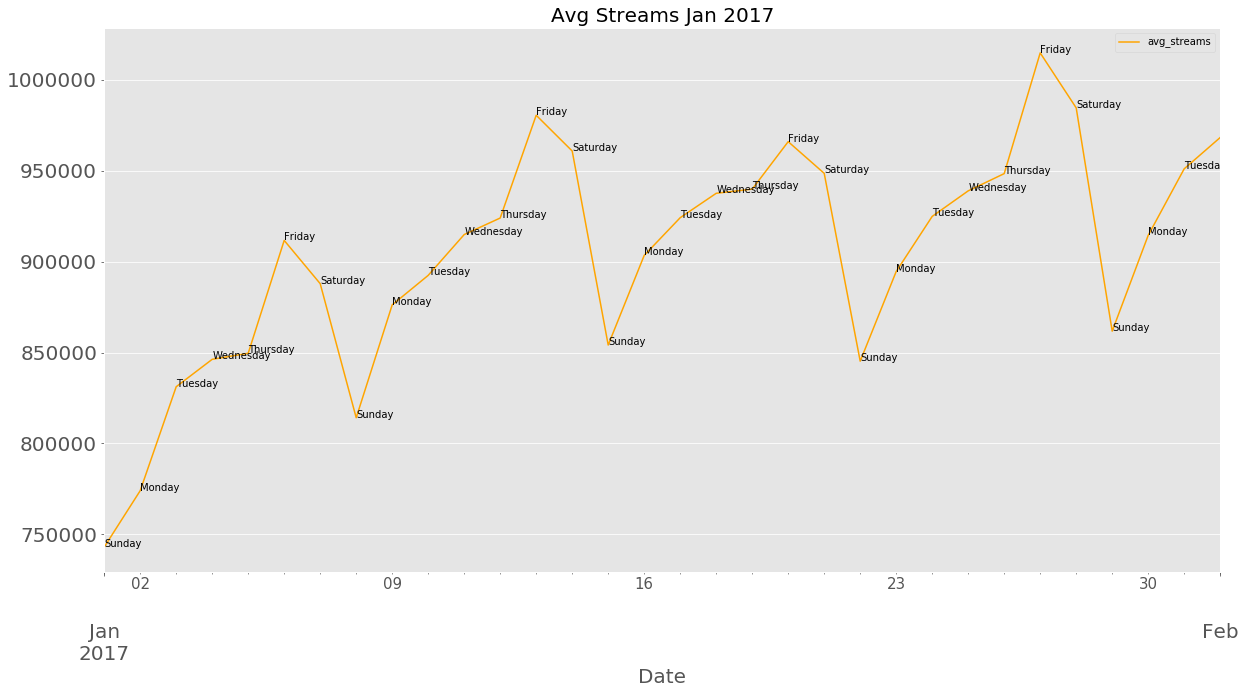

In [15]:
#plotting januray avg_streaming data
ax = jan_data.plot(kind='line',x='Date', y=['avg_streams'], \
                    figsize=(20,10), \
                    title='Avg Streams Jan 2017',\
                    color='orange', fontsize=15)
#increasing font size of plot
bigger_fonts(ax)

# Label points with day of week
date = jan_data['Date'].tolist()
avg_streams = jan_data['avg_streams'].tolist()
day = jan_data['day'].tolist()
for d, i, j in zip(day, date, avg_streams):
    ax.annotate(d, xy=(i,j),clip_on=True)

#dataframe januray avg_streams
# global_streaming_data[['Date','avg_streams','day_of_week']]

## Streaming increases everyday of the week peaking on Friday and drops significantly on Sundays

,day_of_week,day,Streams
0,0,Monday,51114.237236
1,1,Tuesday,51762.966347
2,2,Wednesday,52362.444005
3,3,Thursday,51800.786690
4,4,Friday,55138.074701
5,5,Saturday,53917.110096
6,6,Sunday,48609.954158


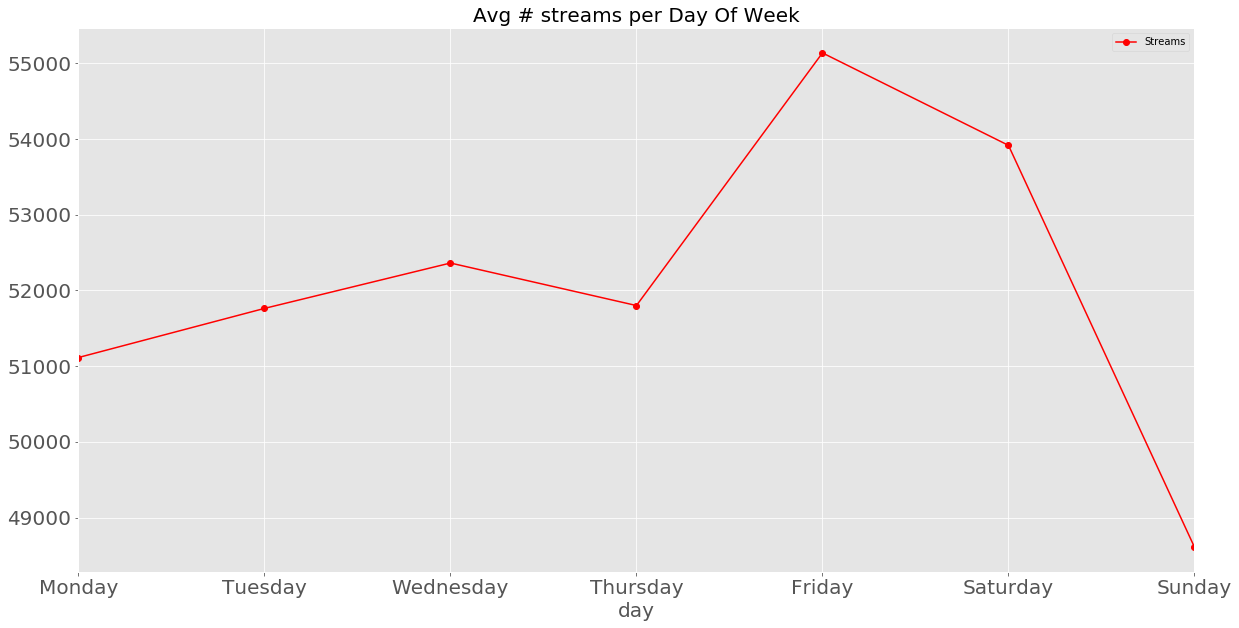

In [16]:
dow = spotify_df.groupby(['day_of_week','day']).mean()['Streams'].reset_index()

#plotting avg_streams per day of week
ax = dow.plot(x='day', y='Streams', figsize=(20,10), marker='o',title='Avg # streams per Day Of Week', color='red')
bigger_fonts(ax)
dow

{}


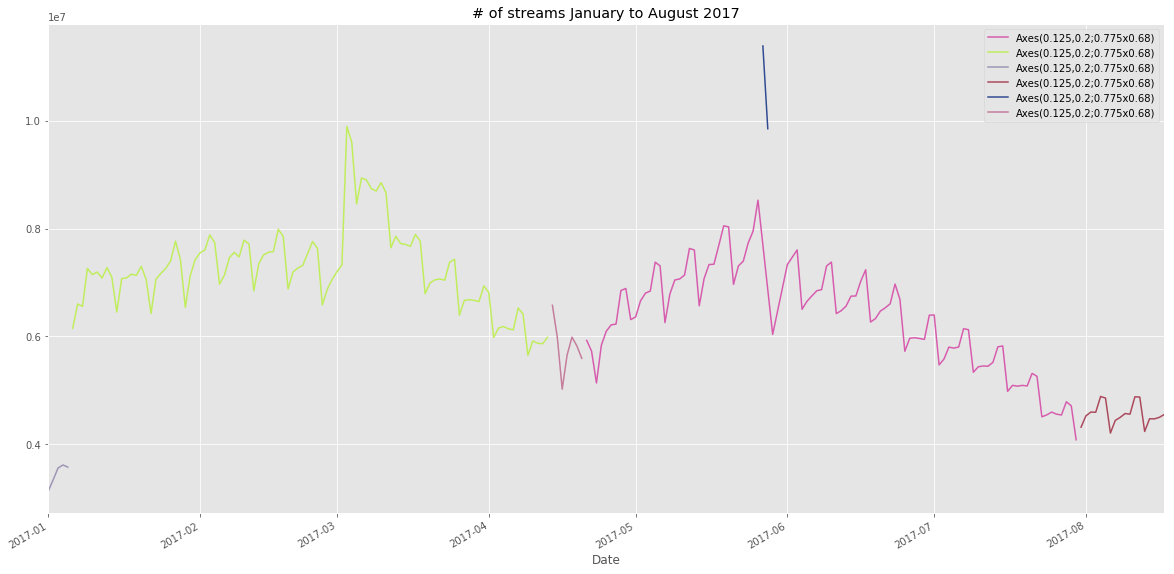

In [47]:
#Plotting top streams colored by #1 trackname
line=[]
fig, ax = plt.subplots(1)
for track in set(global_streaming_data['Track Name'].tolist()):
#     if track not in n_track.keys():
#         c = np.random.rand(3,1).T
#         n_track[track] = c
#     else:
#         c = n_track[track]
    line.append(global_streaming_data[global_streaming_data['Track Name'] == track].plot(ax=ax,x='Date', \
                                            y=['Streams_#1_song'], figsize=(20,10),\
                                            title='# of streams January to August 2017',\
                                            color=np.random.rand(3,1).T))
    plt.legend(line)
print(n_track)

In [ ]:
streaming_data.to_json('/Users/gmgtex/Documents/My Tableau Repository/DataSources/spotify_streaming.json')